In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [5]:
countries = pd.read_pickle("Data/countriesData.pkl")

In [6]:
death_rates_smoking_age = pd.read_csv("Data/death_rates_smoking_age.csv")

In [7]:
countries

,Code,NATL_Surface area (km2),NATL_Population in thousands (2017),"NATL_Population density (per km2, 2017)","NATL_Sex ratio (m per 100 f, 2017)",NATL_GDP: Gross domestic product (million current US$),"NATL_GDP growth rate (annual %, const. 2005 prices)",NATL_GDP per capita (current US$),NATL_Economy: Agriculture (% of GVA),NATL_Economy: Industry (% of GVA),...,NATL_Threatened species (number),NATL_Forested area (% of land area),NATL_CO2 emission estimates (million tons/tons per capita),"NATL_Energy production, primary (Petajoules)",NATL_Energy supply per capita (Gigajoules),NATL_Net Official Development Assist. received (% of GNI),NATL_Pop. using improved drinking water (urban %),NATL_Pop. using improved drinking water (rural %),NATL_Pop. using improved sanitation facilities (urban %),NATL_Pop. using improved sanitation facilities (rural %)
0,AFG,652864.0,35530.0,54.4,106.3,20270.0,-2.4,623.2,23.3,23.3,...,2.1,32.666667,63.0,5.0,1.663830,NaN,45.1,27.0,21.43,NaN
1,ALB,28748.0,2930.0,106.9,101.9,11541.0,2.6,3984.2,22.4,26.0,...,28.2,2.850000,84.0,36.0,0.996849,NaN,95.5,90.2,2.96,NaN
2,DZA,2381741.0,41318.0,17.3,102.0,164779.0,3.8,4154.1,12.2,37.3,...,0.8,39.297297,5900.0,55.0,1.030562,NaN,89.8,82.2,0.05,NaN
3,ASM,199.0,56.0,278.2,103.6,NaN,NaN,NaN,NaN,NaN,...,87.9,NaN,NaN,NaN,1.000000,NaN,62.5,62.5,NaN,NaN
4,AND,468.0,77.0,163.8,102.3,2812.0,0.8,39896.4,0.5,10.8,...,34.0,0.078125,1.0,119.0,1.000000,NaN,100.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,,142.0,12.0,84.1,93.4,NaN,NaN,NaN,NaN,NaN,...,41.6,0.000000,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN
225,,266000.0,553.0,2.1,110.1,NaN,NaN,NaN,NaN,NaN,...,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,YEM,527968.0,28250.0,53.5,102.1,29688.0,-28.1,1106.4,14.7,36.9,...,1.0,25.222222,668.0,12.0,1.548387,NaN,92.5,34.1,2.99,NaN
227,ZMB,752612.0,17094.0,23.0,98.5,21255.0,2.9,1311.1,8.2,32.3,...,65.6,15.000000,374.0,26.0,1.668616,NaN,55.6,35.7,3.96,NaN


In [8]:
GDP = countries[["Country","GDP ($ per capita)"]].copy()

KeyError: "None of [Index(['Country', 'GDP ($ per capita)'], dtype='object')] are in the [columns]"

In [16]:
import pickle

In [17]:
convCountry2Code = pickle.load(open("Data/countryToCode.pkl","rb"))

In [18]:
GDP["Country"] = GDP["Country"].str.strip()

NameError: name 'GDP' is not defined

In [19]:
convCountry2Code.update({"Anguilla":"AIA"})

In [20]:
GDP["Code"] = GDP["Country"].apply(lambda x: convCountry2Code[x] if x in convCountry2Code else "")

NameError: name 'GDP' is not defined

In [21]:
GDP = GDP[["Code","GDP ($ per capita)"]]

NameError: name 'GDP' is not defined

In [22]:
death_rates_smoking_age = death_rates_smoking_age[["Code","Year","All_ages"]]

In [23]:
death_rates_smoking_age = death_rates_smoking_age.pivot_table("All_ages",["Code"],"Year")

In [24]:
death_rates_smoking_age["avg"]  = death_rates_smoking_age.mean(axis=1)

In [25]:
death_rates_smoking_age.columns = ["deathRate_"+str(x) for x in death_rates_smoking_age.columns]

In [26]:
A = GDP[["Code","GDP ($ per capita)"]].copy()

NameError: name 'GDP' is not defined

In [27]:
B = death_rates_smoking_age.reset_index()[["Code","deathRate_avg"]].copy()

In [28]:
cbd = pd.merge(B,A,how="inner")

In [29]:
cbd

,Code,deathRate_avg,NATL_Population in thousands (2017)
0,AFG,38.164768,35530.0
1,AGO,43.738552,29784.0
2,ALB,102.009951,2930.0
3,AND,95.704627,77.0
4,ARE,16.368323,9400.0
...,...,...,...
182,WSM,81.374341,196.0
183,YEM,44.052553,28250.0
184,ZAF,81.575526,56717.0
185,ZMB,35.539675,17094.0


<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='deathRate_avg'>

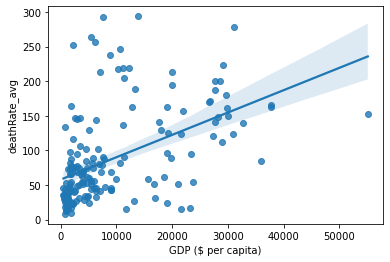

In [128]:
sns.regplot(data=cbd,x ="GDP ($ per capita)", y= "deathRate_avg")

In [129]:
countries["Country"] =countries["Country"].str.strip()

In [130]:
countries["Code"] = countries["Country"].apply(lambda x: convCountry2Code[x] if x in convCountry2Code else "")

In [131]:
from matplotlib import pyplot as plt

In [132]:
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,ASM
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,...,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,...,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400,
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,...,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,YEM
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,...,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,ZMB


In [134]:
countries.columns[2:-1]

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [32]:
from matplotlib import pyplot as plt

C:\Users\yuyan\AppData\Local\Temp/ipykernel_1852/898443433.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots()


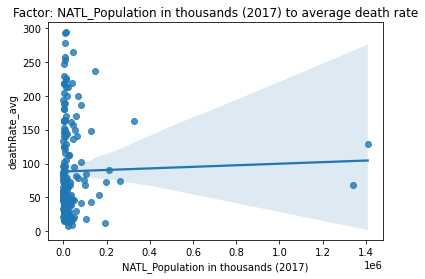

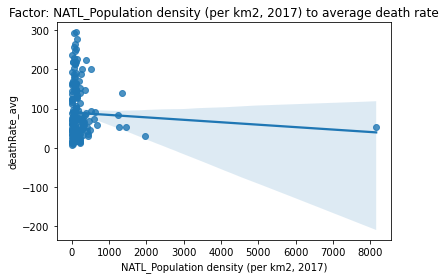

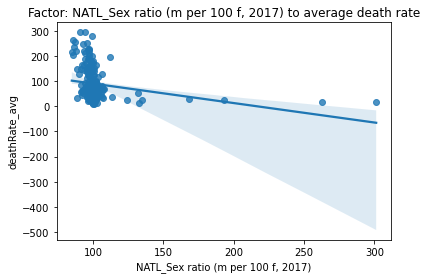

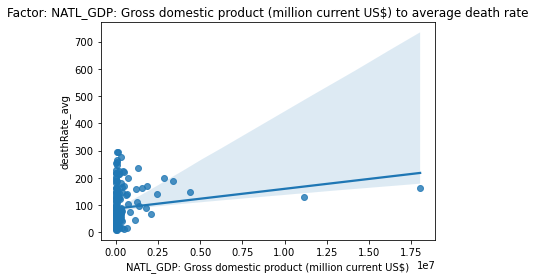

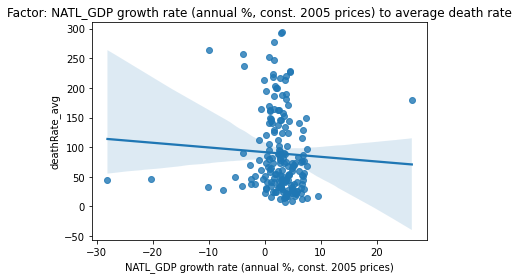

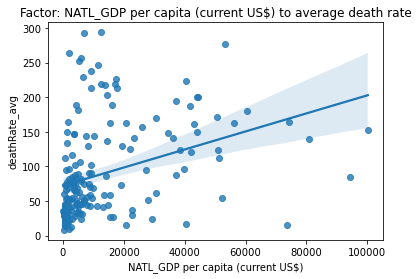

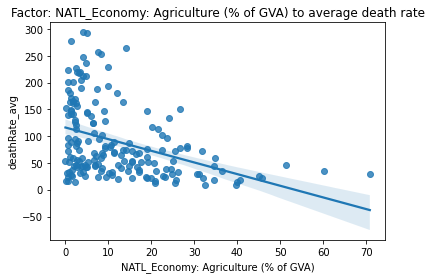

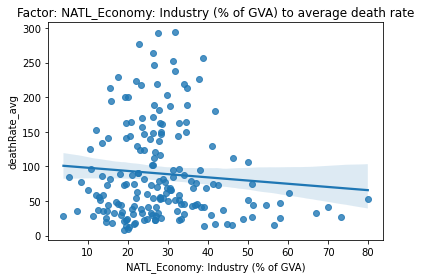

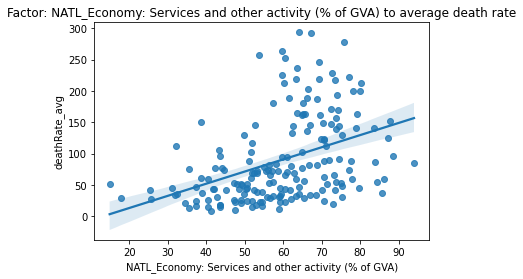

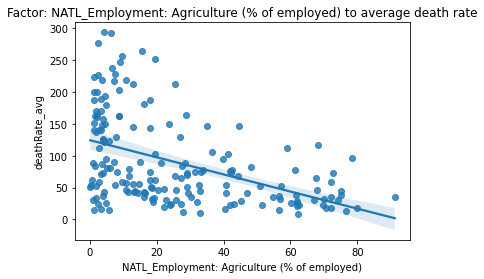

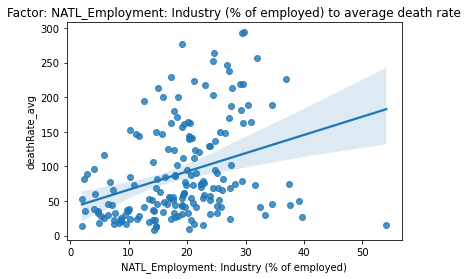

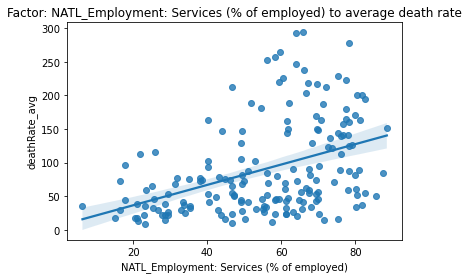

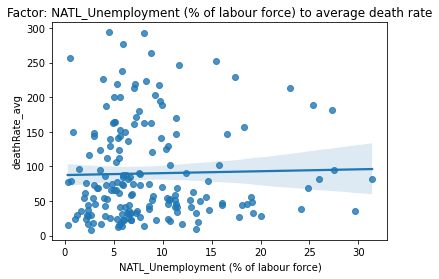

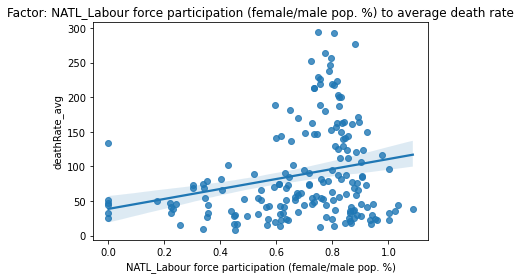

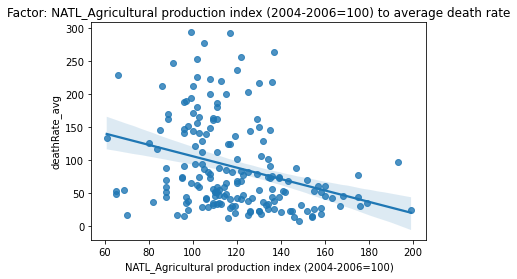

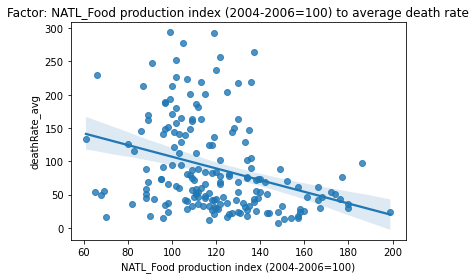

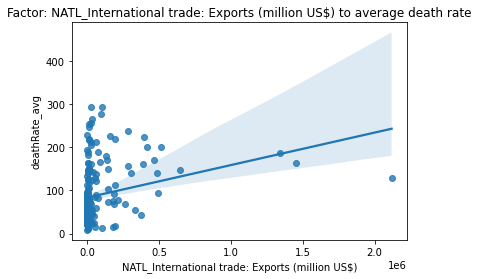

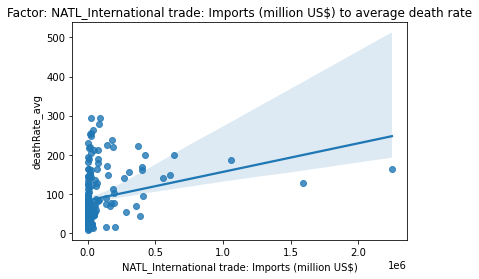

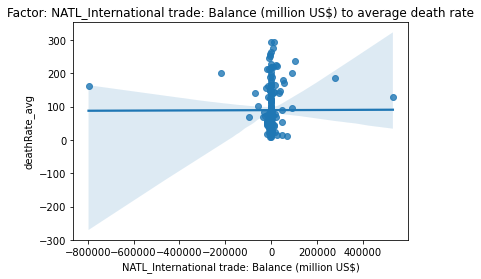

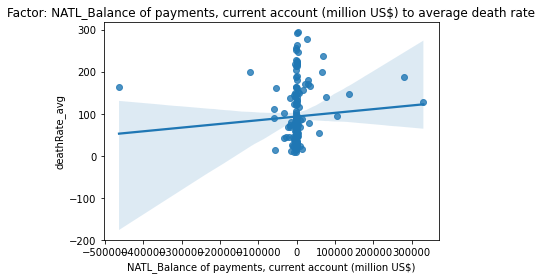

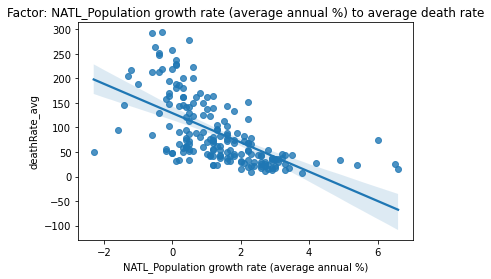

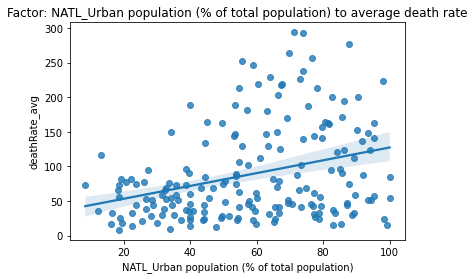

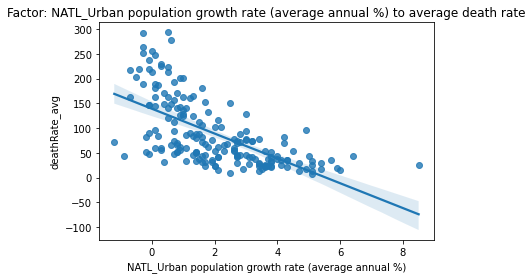

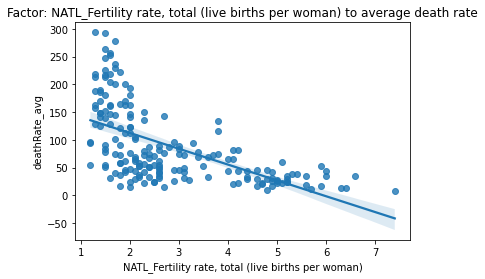

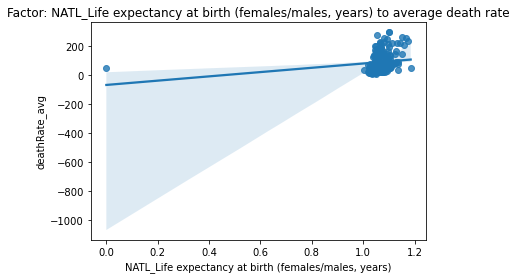

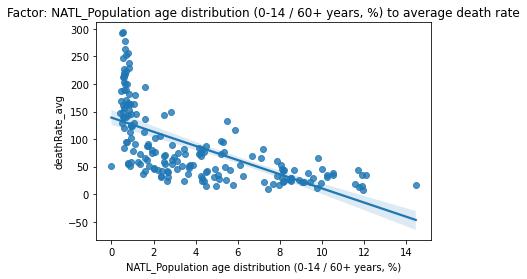

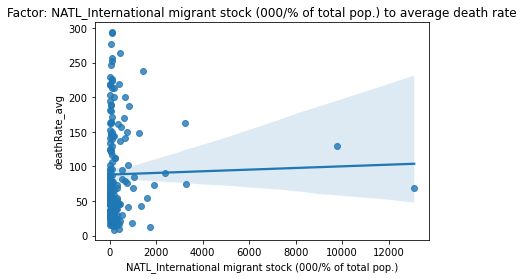

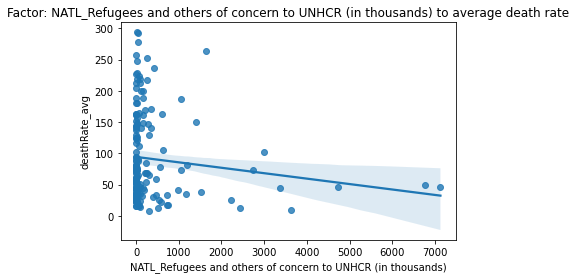

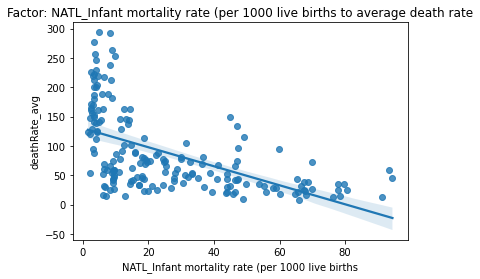

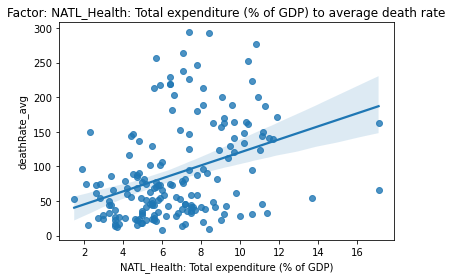

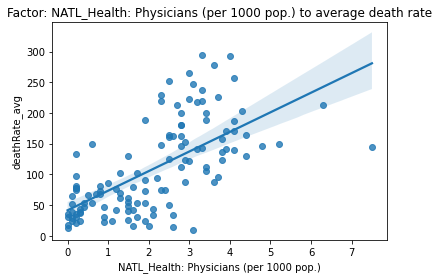

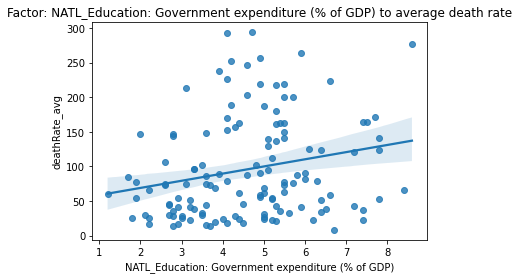

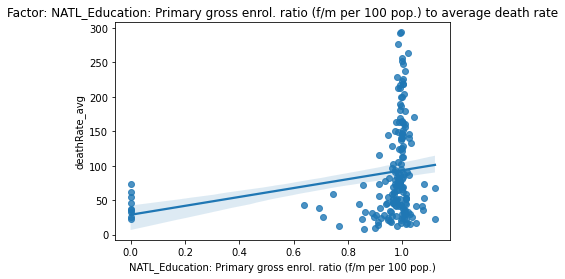

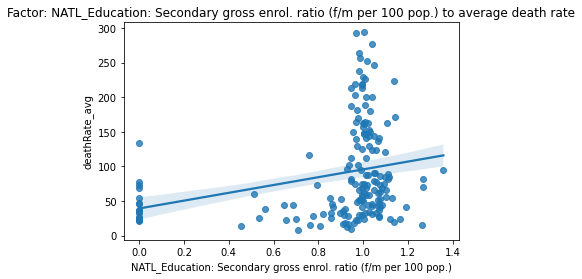

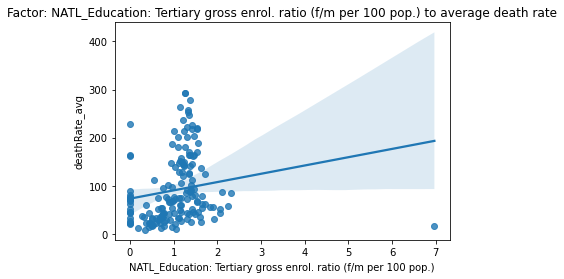

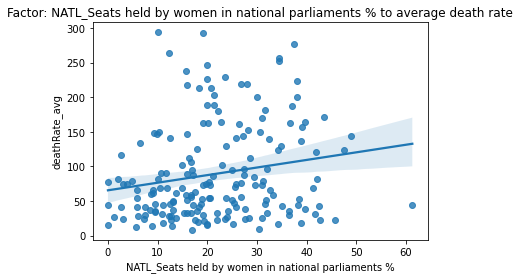

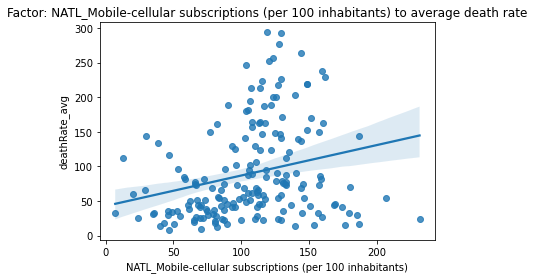

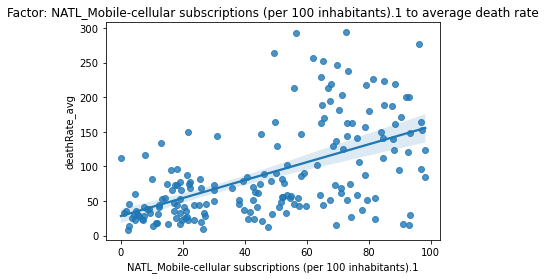

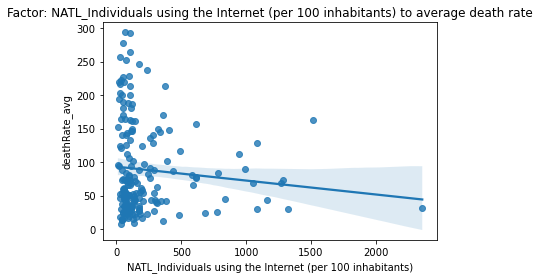

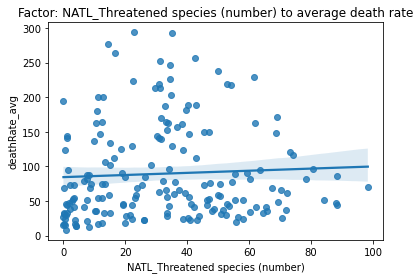

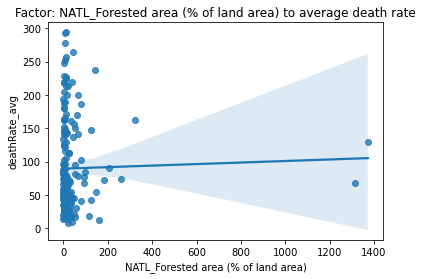

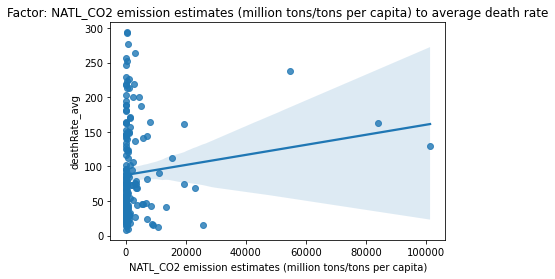

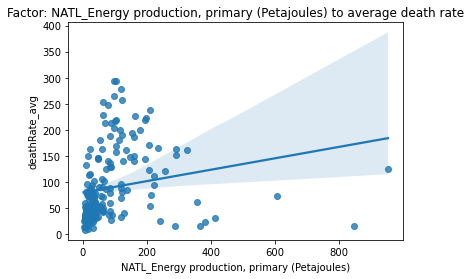

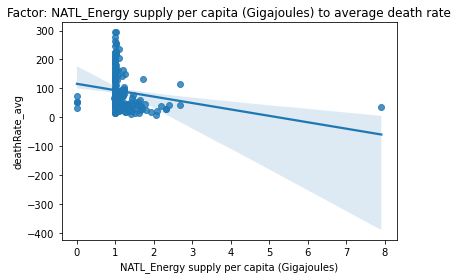

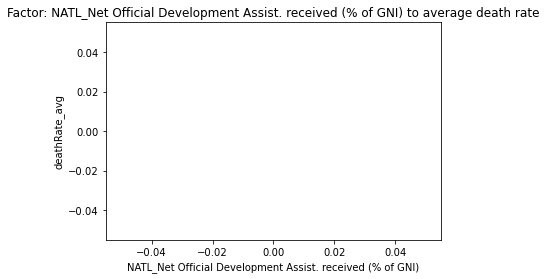

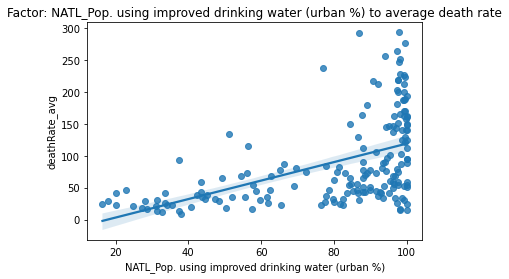

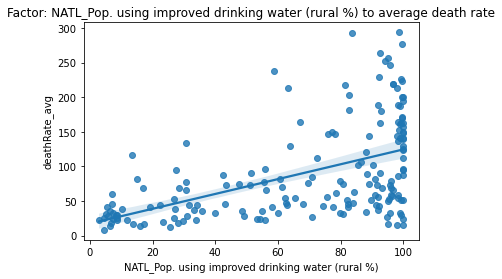

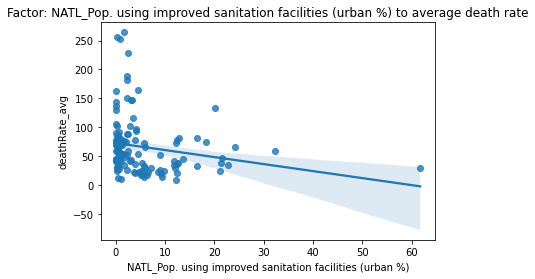

In [37]:

for column in countries.columns[2:-1]:
    A = countries[["Code",column]].copy()
    B = death_rates_smoking_age.reset_index()[["Code","deathRate_avg"]].copy()
    #print(A)
    #print(B)
    cbd = pd.merge(B,A,how="inner")
    fig,ax = plt.subplots()
    
    sns.regplot(data=cbd,x =column, y= "deathRate_avg")
    plt.title("Factor: {x} to average death rate".format(x=column))
    plt.savefig("gallery/Factor.{x} to average death rate.png".format(x=column.replace("%","").replace("/",".")))